<a href="https://colab.research.google.com/github/amirmamdouh123/Heart-Disease-Classification/blob/master/projjecct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

### Task 1: Importing libraries and Exploring the Dataset.

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%cd /content/drive/MyDrive/Projects

/content/drive/MyDrive/Projects


### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [41]:
df =pd.read_csv(r'heart - heart.csv')
df.info()

young_pecentage=(df[df['age']<=35]['age'].count())/(df['age'].count())*100

female_prone = df[df['sex']==0]['sex'].count()>df[df['sex']==1]['sex'].count()
female_prone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


False

In [42]:
list=[]
for i in df.columns:
    if df[i].max()>10:
        print(i)
        list.append(i)


age
trestbps
chol
thalach


In [43]:
for i in list:
    df[i]=df[i].apply(lambda x: (x-df[i].min())/df[i].max())

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.441558,1,3,0.255,0.189716,1,0,0.391089,0,2.3,0,0,1,1
1,0.103896,1,2,0.180,0.219858,0,1,0.574257,0,3.5,0,0,2,1
2,0.155844,0,1,0.180,0.138298,0,0,0.500000,0,1.4,2,0,2,1
3,0.350649,1,1,0.130,0.195035,0,1,0.529703,0,0.8,2,0,2,1
4,0.363636,0,0,0.130,0.404255,0,1,0.455446,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.363636,0,0,0.230,0.203901,0,1,0.257426,1,0.2,1,0,3,0
299,0.207792,1,3,0.080,0.244681,0,1,0.301980,0,1.2,1,0,3,0
300,0.506494,1,0,0.250,0.118794,1,1,0.346535,0,3.4,1,2,3,0
301,0.363636,1,0,0.180,0.008865,0,1,0.217822,1,1.2,1,1,3,0


### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

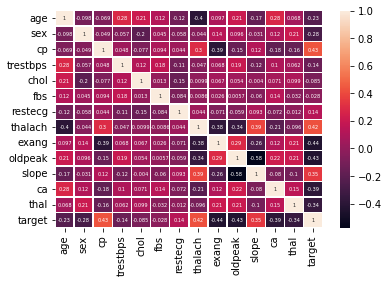

In [44]:
sns.heatmap(df.corr(), annot=True ,linewidth=0.5,annot_kws={'size':5})


In [45]:
models ={}


### Task 4: creat a model that fits the data

In [46]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

models ={}

x_train ,x_test,y_train,y_test= train_test_split(X,Y,test_size=1/5,random_state=0)

model= LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

Logistic_accuray=accuracy_score(y_pred=y_pred,y_true=y_test)


### Task 5: creating an accurecy table

In [47]:
models['Losistic Model']=Logistic_accuray*100


In [48]:
from sklearn.metrics import classification_report

report= classification_report(y_pred,y_test)
print (report)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
KNN_pred=knn.predict(x_test)

KNN_accuray=accuracy_score(y_pred=KNN_pred,y_true=y_test)

models['KNN Model']=KNN_accuray*100



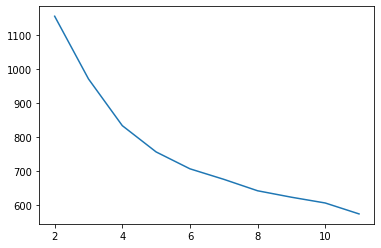

In [50]:
from sklearn.cluster import KMeans

K=range(2,12)
wss=[]
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300,random_state=0)
    kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
plt.plot(K,wss)


In [51]:
kmeans= KMeans(n_clusters=2,random_state=0)
means_pred= kmeans.fit_predict(X)
# can't draw because it's more than 2 dimensions
Kmeans_accracy =accuracy_score(y_pred=means_pred,y_true=Y)

models['Kmeans Model']=Kmeans_accracy*100



In [52]:
from sklearn.cluster import DBSCAN

DBSCAN_pred=DBSCAN(eps=2 , min_samples=5).fit_predict(X)
# can't draw because it's more than 2 dimensions
DBSCAN_accuracy=accuracy_score(y_pred=DBSCAN_pred,y_true=Y)
models['DBSCAN Model']=DBSCAN_accuracy*100



In [53]:
from sklearn import svm

C = 0.5  # SVM regularization parameter
Poly_SVC_Model = svm.SVC(kernel='poly', degree=2, C=C).fit(x_train, y_train)
prediction = Poly_SVC_Model.predict(x_test)
svm_accuracy=accuracy_score(y_test, prediction)
models['SVM Model']=svm_accuracy*100




In [54]:
#so the best model that fitted in our heart desease dataset is (KNN Model and SVM model)with the same accuracy
# followed by Logistic regression.


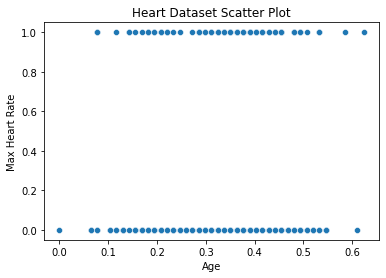

In [55]:
# Create the plot
sns.scatterplot(x='age', y='exang', data=df)
 
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Scatter Plot')
 
# Show plot
plt.show()

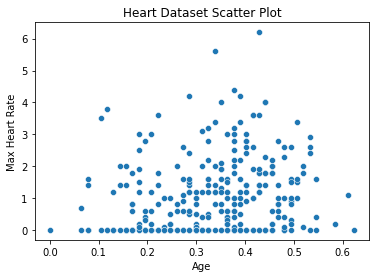

In [56]:
# Create the plot
sns.scatterplot(x='age', y='oldpeak', data=df)
 
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Scatter Plot')
 
# Show plot
plt.show()

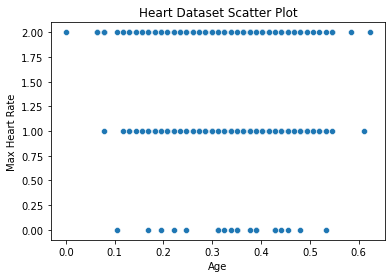

In [57]:
# Create the plot
sns.scatterplot(x='age', y='slope', data=df)
 
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Scatter Plot')
 
# Show plot
plt.show()

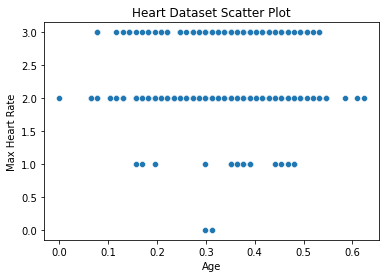

In [58]:
# Create the plot
sns.scatterplot(x='age', y='thal', data=df)
 
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Scatter Plot')
 
# Show plot
plt.show()

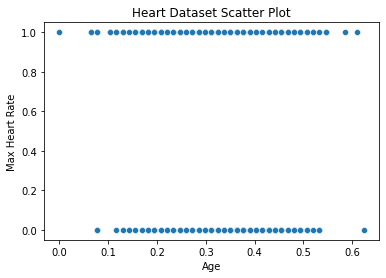

In [59]:
# Create the plot
sns.scatterplot(x='age', y='target', data=df)
 
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Scatter Plot')
 
# Show plot
plt.show()

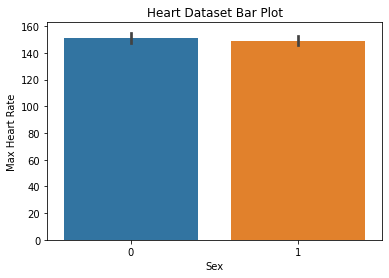

In [60]:

# Load the heart dataset
heart = pd.read_csv("heart - heart.csv")
 
# Create the plot
sns.barplot(x='sex', y='thalach', data=heart)
 
# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Bar Plot')
 
# Show plot
plt.show()

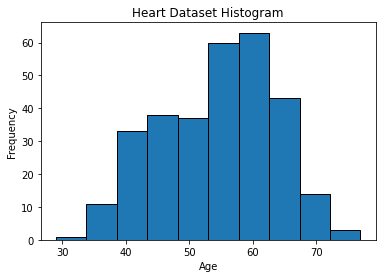

In [61]:

# Create the plot
plt.hist(heart['age'], bins=10, edgecolor='black')
 
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Heart Dataset Histogram')
 
# Show plot
plt.show()


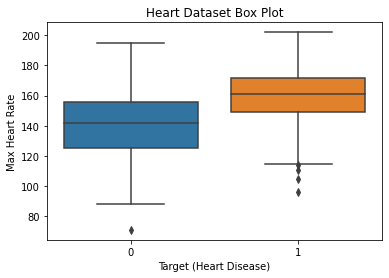

In [62]:

# Create the plot
sns.boxplot(x='target', y='thalach', data=heart)
 
# Add labels and title
plt.xlabel('Target (Heart Disease)')
plt.ylabel('Max Heart Rate')
plt.title('Heart Dataset Box Plot')
 
# Show plot
plt.show()


In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
rfc.fit(x_train, y_train)

# Predict the target values for the test data
rfc_pred = rfc.predict(x_test)

# Evaluate the model using accuracy metrics
rfc = rfc.score(x_test, y_test)
models['rfc Model']=rfc*100



In [64]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, solver='adam', random_state=42)

# Fit the model to the training data
mlp.fit(x_train, y_train)

# Make predictions on the test data
mlp_pred = mlp.predict(x_test)

# Evaluate the model using accuracy score
mlp_acc = accuracy_score(y_true=y_test, y_pred=mlp_pred)
models['mlp Model']=mlp_acc*100


In [65]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier



# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(x_train, y_train)

# Make predictions on the test data
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_true=y_test, y_pred=dt_pred)
models['dt Model']=dt_acc*100
# Evaluate the model using accuracy score


In [66]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gbc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(x_test)

# Evaluate the model using accuracy score
gbc_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
models['gbc Model']=gbc_acc*100



In [69]:
M =sorted(models,reverse=True)
for i in M:
    print('The accuracy of {} is : {:.2f}%'.format(i,models[i])) 


print('percentage of younger people are prone to be diagnosed with heart disease: {:.2f}% '.format(young_pecentage))

if(female_prone):
  print('women are more prone to heart diseases than men')
else:
  print('women less prone to heart diseases than men')



The accuracy of rfc Model is : 86.89%
The accuracy of mlp Model is : 86.89%
The accuracy of gbc Model is : 80.33%
The accuracy of dt Model is : 78.69%
The accuracy of SVM Model is : 86.89%
The accuracy of Losistic Model is : 85.25%
The accuracy of Kmeans Model is : 79.54%
The accuracy of KNN Model is : 86.89%
The accuracy of DBSCAN Model is : 43.89%
percentage of younger people are prone to be diagnosed with heart disease: 2.31% 
women less prone to heart diseases than men


In [68]:
#as a preprocessing the data was totally ready but we needed to do normalizatoin only for features whose values with large range
#so the best model that fitted in our heart desease dataset is (KNN Model and SVM model)with the same accuracy
# followed by Logistic regression.